In [3]:
import csv
import pandas as pd

data1=open("C:/Users/xyr19/Desktop/python19/item-2018-06-01-2018-07-05.csv")
data2=open("C:/Users/xyr19/Desktop/python19/Basket-2018-06-01-2018-07-05.csv")
df1 = pd.read_csv(data1)
df2 = pd.read_csv(data2)
print(df1.head(5))
print(df2.head(5))

        SDATE STORE_CODE  POSID  BASK_CODE  PROD_CODE  ITEM_QUANTITY  \
0  2018-06-01       D007      3     250451      29405          1.000   
1  2018-06-01       D007      3     250451      13187          1.000   
2  2018-06-01       D007      3     250243     196249          1.000   
3  2018-06-01       D007      3     250243     199637          1.000   
4  2018-06-01       D007      1     160905     195012          3.222   

   ITEM_SPEND  NORMAL_PRICE DISCOUNT_TYPE  DISCOUNT_AMOUNT  
0        1.70           2.0             m             -0.3  
1        1.00           1.0             n              0.0  
2       99.00          99.0             m              0.0  
3        9.90          16.8             p             -6.9  
4       18.69           5.8             n              0.0  
  SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
0    2018-06-01       D007       3     250458         8.0
1    2018-06-01       D007       3     250200        32.7
2    2018-06-01       D007 

In [30]:
#统计两个csv文件是否存在缺失值。
df2.isnull().any()

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool

In [31]:
df1.isnull().any()

SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool

In [4]:
#对basket列表日期进行排序
Basketdata = df2.sort_index(axis=0,by=["SHOP_DATETIME"])
print(Basketdata[25:30])

C:\Users\xyr19\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


       SHOP_DATETIME STORE_CODE  POS_NO  BASK_CODE  BASK_SPEND
215263    2018-06-01       D002       5     207961         1.5
215262    2018-06-01       D002       8      82213         8.5
215274    2018-06-01       D006       3     148745        34.9
215289    2018-06-01       D007       1     160912        56.0
215290    2018-06-01       D007       1     161147        11.8


In [6]:
# 统计每个商店销售额
sell =Basketdata.groupby(by="STORE_CODE")
df2_sell = sell["BASK_SPEND"].sum()
df2_sell

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

In [7]:
#按日期统计总销售额
Dsell =Basketdata.groupby(by="SHOP_DATETIME")
data_sell2 = Dsell["BASK_SPEND"].sum()
data_sell2

SHOP_DATETIME
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

In [40]:
# 统计每个商店的pos机
S_pos =Basketdata.groupby(by="STORE_CODE")
Shop_pos = S_pos["POS_NO"]
Shop_pos.unique()

STORE_CODE
A001               [3, 9, 6, 2, 10, 1, 5, 4]
A004                               [2, 4, 1]
A006                               [2, 4, 1]
A007                               [1, 2, 8]
A008                      [1, 3, 8, 2, 6, 4]
A009                               [1, 2, 8]
A010                               [2, 8, 3]
A012                            [2, 3, 8, 1]
A013                         [6, 2, 4, 8, 1]
A016                               [1, 2, 3]
A017                                  [1, 8]
A018                               [1, 2, 4]
A019                               [1, 2, 3]
A021                            [2, 3, 4, 1]
A022                                  [2, 1]
D002    [5, 8, 4, 6, 1, 20, 13, 7, 2, 19, 9]
D003                                  [2, 1]
D004                               [2, 1, 4]
D005                               [2, 3, 4]
D006                               [2, 3, 1]
D007                            [3, 1, 8, 4]
D008                               [4, 1, 2]

In [34]:
#统计每个商店的购物篮个数
S_basket =Basketdata.groupby(by="STORE_CODE")
Shop_basket = S_basket["BASK_CODE"]
Shop_basket.unique()

STORE_CODE
A001    [25440, 25474, 25121, 25176, 266577, 229111, 2...
A004    [108542, 108376, 3043, 108240, 3045, 108290, 1...
A006    [290886, 143370, 143369, 290882, 291181, 29117...
A007    [116215, 115995, 116088, 116230, 116001, 11600...
A008    [271004, 163781, 163670, 163615, 163407, 27085...
A009    [244862, 244868, 50740, 244675, 244699, 244530...
A010    [259404, 259265, 258937, 259390, 259375, 25931...
A012    [282809, 282667, 112895, 282096, 282165, 11271...
A013    [150359, 150283, 150101, 194937, 150033, 15015...
A016    [78658, 78574, 78561, 78383, 78381, 78235, 787...
A017    [177521, 177505, 177504, 177490, 177390, 17738...
A018    [199163, 198913, 199055, 199064, 198886, 19890...
A019    [192017, 192069, 192072, 191687, 192019, 19176...
A021    [97476, 73060, 97463, 46475, 72992, 73070, 731...
A022    [56341, 10386, 56344, 56343, 56342, 56318, 560...
D002    [207961, 82213, 143621, 204453, 49301, 204410,...
D003    [52997, 53044, 53089, 53088, 53062, 53061, 532...
D00

In [26]:
#统计商品的种类
Shop_code = Basketdata["BASK_CODE"]
Shop_code.count()

571552

<function matplotlib.pyplot.show(*args, **kw)>

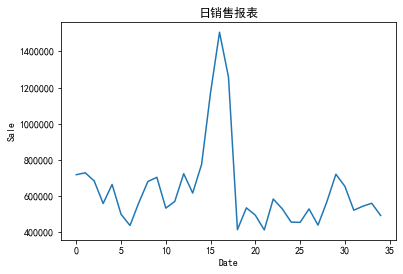

In [19]:
#绘制以日期为自变量，销售金额为因变量的函数图像
import matplotlib.pyplot as plt
x = Basketdata.groupby(by="SHOP_DATETIME")
y = data_sell2.values
plt.plot(y)
plt.xlabel("Date")
plt.ylabel("Sale")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
plt.title("日销售报表")
plt.show

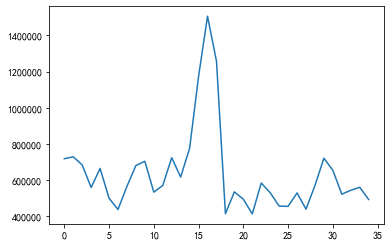

In [12]:
#绘制以商店编号为自变量，销售金额为因变量的函数图像
x1 = Basketdata.groupby(by="STORE_CODE")
y1 = data_sell2.values
plt.plot(y)